In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from pandas_datareader import data as pdr
import yfinance as yf

In [2]:
# Set up Yahoo Finance
yf.pdr_override()

# Load historical stock price data (you can replace 'AAPL' with any stock symbol)
symbol = 'AAPL'
start_date = '2010-01-01'
end_date = '2021-09-01'
data = pdr.get_data_yahoo(symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [3]:
# Preprocess the data
data = data[['Adj Close']]
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [4]:

# Create a dataset for training
look_back = 60  # Number of previous days to use for prediction
X, y = [], []
for i in range(look_back, len(data_scaled)):
    X.append(data_scaled[i-look_back:i, 0])
    y.append(data_scaled[i, 0])
X, y = np.array(X), np.array(y)

In [5]:
# Reshape the data for LSTM input
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [6]:
# Build an LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))


In [7]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [8]:
# Train the model
model.fit(X, y, epochs=100, batch_size=32)

Epoch 1/100
90/90 [==============================] - 7s 33ms/step - loss: 0.0052
Epoch 2/100
90/90 [==============================] - 3s 33ms/step - loss: 2.5262e-04
Epoch 3/100
90/90 [==============================] - 3s 33ms/step - loss: 2.6004e-04
Epoch 4/100
90/90 [==============================] - 3s 33ms/step - loss: 2.3964e-04
Epoch 5/100
90/90 [==============================] - 3s 34ms/step - loss: 2.0150e-04
Epoch 6/100
90/90 [==============================] - 3s 34ms/step - loss: 2.1656e-04
Epoch 7/100
90/90 [==============================] - 3s 34ms/step - loss: 1.8724e-04
Epoch 8/100
90/90 [==============================] - 3s 35ms/step - loss: 1.9776e-04
Epoch 9/100
90/90 [==============================] - 3s 35ms/step - loss: 1.6459e-04
Epoch 10/100
90/90 [==============================] - 3s 36ms/step - loss: 1.5085e-04
Epoch 11/100
90/90 [==============================] - 3s 36ms/step - loss: 1.5090e-04
Epoch 12/100
90/90 [==============================] - 3s 38ms/step 

In [12]:

# Scale the test data using the same scaler used for training
scaled_test_data = scaler.transform(data)

# Prepare test data for prediction
X_test, y_test = [], []
for i in range(look_back, len(scaled_test_data)):
    X_test.append(scaled_test_data[i-look_back:i, 0])
    y_test.append(scaled_test_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

# Reshape the test data for LSTM input
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make predictions
predicted_prices = model.predict(X_test)

# Inverse transform the predicted prices to their original scale
predicted_prices = scaler.inverse_transform(predicted_prices)

90/90 [==============================] - 5s 30ms/step


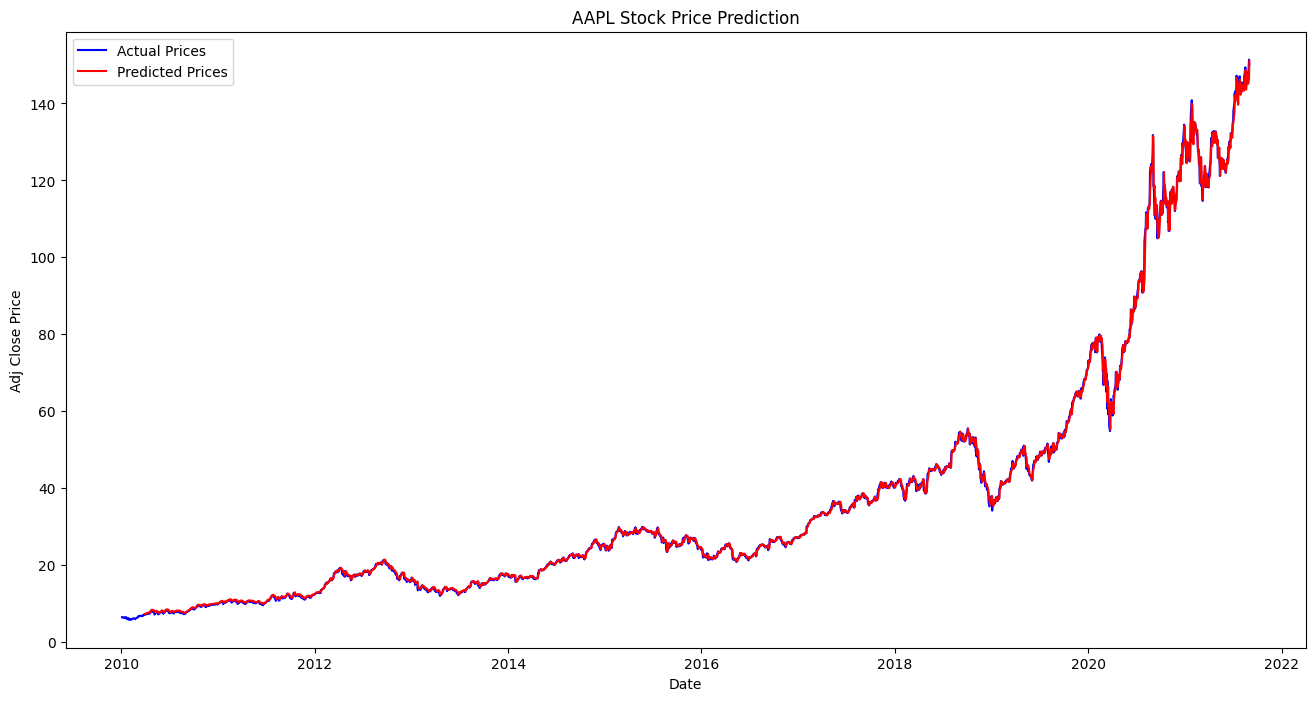

In [16]:
# Plot the predictions
plt.figure(figsize=(16, 8))
plt.title(f'{symbol} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.plot(data.index, data['Adj Close'], label='Actual Prices', color='blue')
plt.plot(data.index[look_back:], predicted_prices, label='Predicted Prices', color='red')
plt.legend()
plt.show()